In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from lightning import Trainer
from torchvision.io import read_image
from torchvision.transforms.functional import to_pil_image
from torchvision.transforms.v2.functional import resize_image
from torchvision.utils import make_grid

from data.datamodule import DataModule
from model.resnet import ResNetForImageClassification


In [2]:
data_module = DataModule(
    predict=True,
    data_dir=Path('../imagewoof2/test'),
    batch_size=32,
    num_workers=2
)

In [3]:
model = ResNetForImageClassification(
    num_classes=data_module.info.num_classes,
    id2class=data_module.info.id2class
)

In [4]:
trainer = Trainer()
result = trainer.predict(
    model=model,
    datamodule=data_module,
    ckpt_path='../checkpoints/epoch=66-val_f1score_macro_avg=0.74.ckpt'
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at ../checkpoints/epoch=66-val_f1score_macro_avg=0.74.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ../checkpoints/epoch=66-val_f1score_macro_avg=0.74.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

In [5]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    fig.set_dpi(300)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])


images = []
for image_path in data_module.predict.image_paths:
    image = read_image(str(image_path))
    image = resize_image(image, [256, 256])
    images.append(image)

grid = make_grid(images)

/home/maxim/repos/processing-and-generating-images-course/venv/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


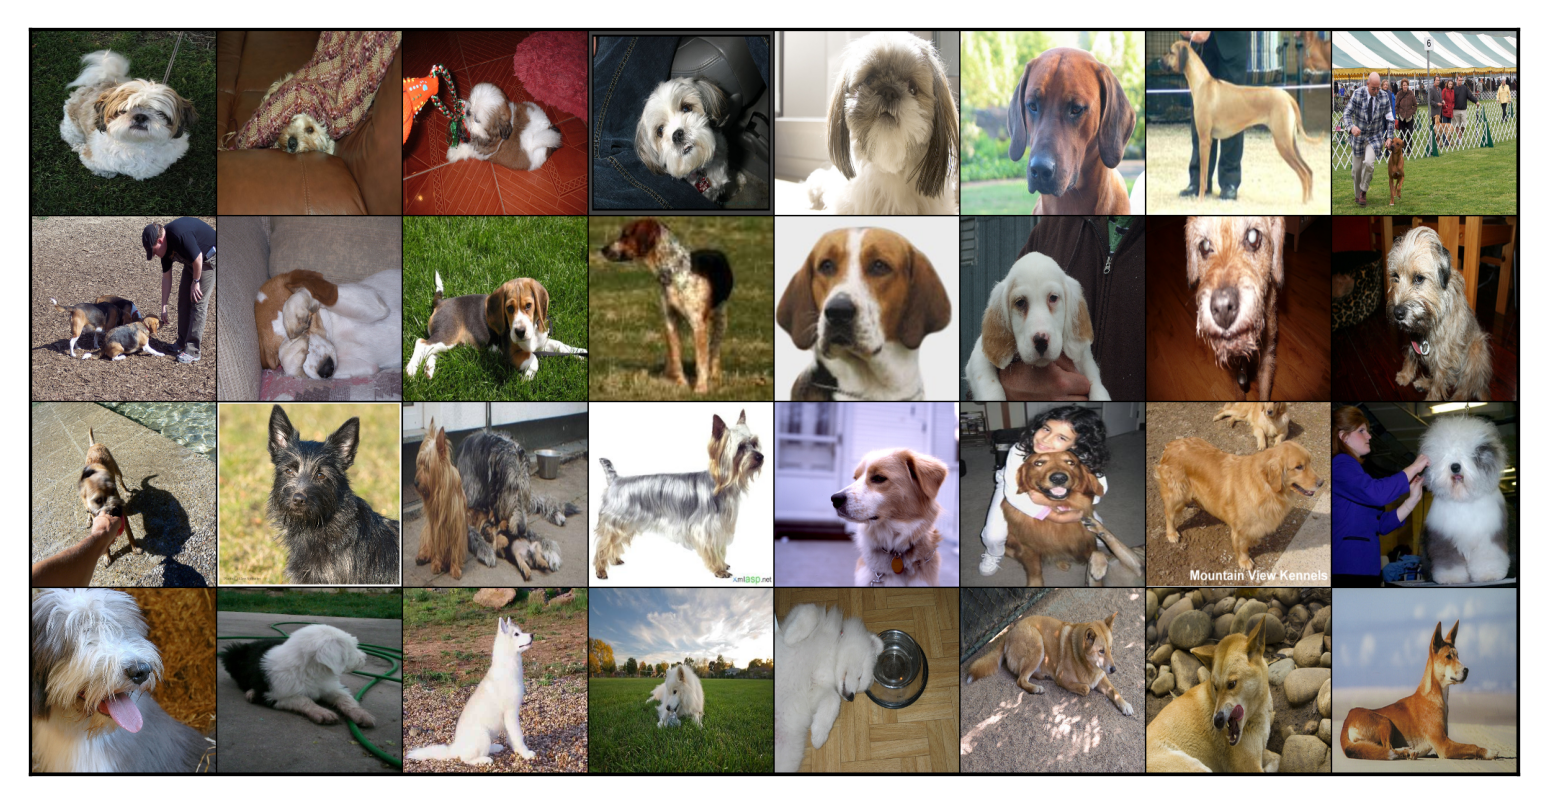

In [6]:
show(grid)

In [7]:
print(result[0])

['Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Shih-Tzu', 'Rhodesian_ridgeback', 'Rhodesian_ridgeback', 'Rhodesian_ridgeback', 'English_foxhound', 'Shih-Tzu', 'Beagle', 'English_foxhound', 'English_foxhound', 'Beagle', 'Golden_retriever', 'Australian_terrier', 'Dingo', 'Rhodesian_ridgeback', 'Border_terrier', 'Border_terrier', 'Golden_retriever', 'Beagle', 'Dingo', 'Old_English_sheepdog', 'Old_English_sheepdog', 'Old_English_sheepdog', 'Samoyed', 'Samoyed', 'Samoyed', 'Dingo', 'Dingo', 'Dingo']
